<a href="https://colab.research.google.com/github/ArpanGyawali/CNN_models/blob/main/identity_residual_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from keras.layers import Conv2D, Input, Activation
from keras.layers.merge import add
from keras.utils.vis_utils import plot_model
from keras.models import Model

In [7]:
def identity_resNet(layer_in, n_features):
  identity_layer = layer_in

  if layer_in.shape[-1] != n_features:
    identity_layer = Conv2D(n_features, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
  
  conv1 = Conv2D(n_features, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
  conv2 = Conv2D(n_features, (3, 3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
  layer_out = add([conv2, identity_layer])
  layer_out = Activation('relu')(layer_out)
  
  return layer_out


In [9]:
visible = Input(shape=(256, 256, 3))
layer = identity_resNet(visible, 64)
model = Model(inputs=visible, outputs=layer)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d_1[0][0]']               
                                )                                                             

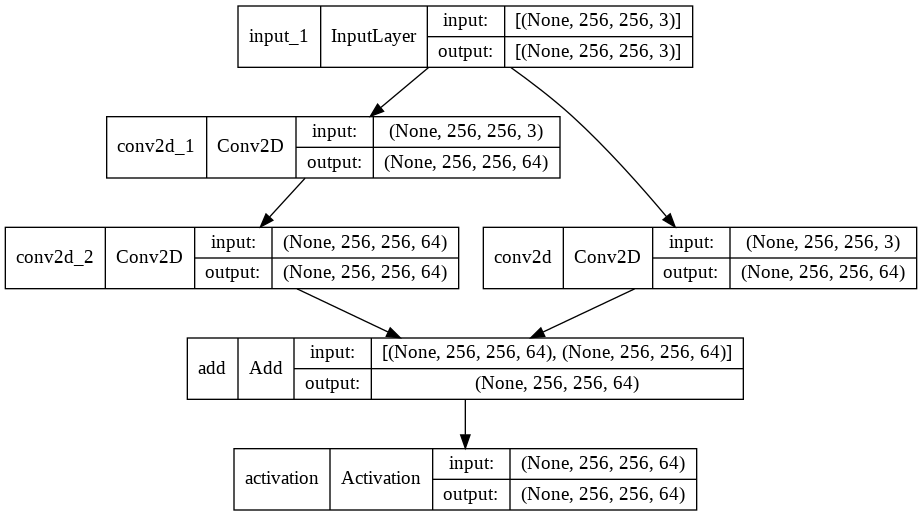

In [12]:
plot_model(model, show_shapes=True, to_file='identity_resNet_module.png')